# Assignment 3

## Sourcing data from URL.

Author: Kyra Menai Hamilton

Brief: 

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.

Marks will be given for:

Just creating the pie chart
Making it look nice
As always your code should be well laid out.

In [17]:
# Import the modules needed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


1. Source the data

In [18]:
# First need to save the data from the url.

df = pd.read_csv("https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download")
print(df.head(5)) # to check it worked.

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


2. Make a pie chart

In [ ]:
# The data needs to be cleaned to remove any rows with missing data.
df = df.dropna()
print(df.head(5)) # to check it worked.

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  
     Index          User Id First Name Last Name  

In [20]:
# Now to make a pie chart we need to group the data by Job Title and count the number of User Id in each Job Title role.
grouped = df.groupby('Job Title').count()['User Id']
print(grouped)

Job Title
Academic librarian                      5
Accommodation manager                   2
Accountant, chartered                   1
Accountant, chartered certified         3
Accountant, chartered public finance    3
                                       ..
Water quality scientist                 2
Web designer                            3
Wellsite geologist                      1
Writer                                  3
Youth worker                            2
Name: User Id, Length: 519, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_27164\783929663.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [df['Job Title'].value_counts()[0], df['Job Title'].value_counts()[1], df['Job Title'].value_counts()[2], df['Job Title'].value_counts()[3]]
C:\Users\Admin\AppData\Local\Temp\ipykernel_27164\783929663.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [df['Job Title'].value_counts()[0], df['Job Title'].value_counts()[1], df['Job Title'].value_counts()[2], df['Job Title'].value_counts()[3]]
C:\Users\Admin\AppData\Local\Temp\ipykernel_27164\783929663.py:8: FutureWarning: Series.__getitem__ tr

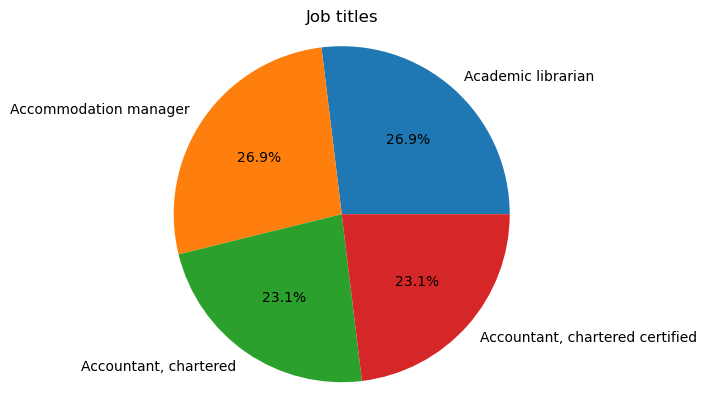

In [25]:
# Need to Enable inline plotting for this Jupyter Notebook.
# %matplotlib inline # https://www.datacamp.com/tutorial/exploring-matplotlib-inline-a-quick-tutorial 

# For plot types https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.06-Bar-Charts-and-Pie-Charts/#:~:text=Pie%20charts%20can%20be%20constructed,list%20of%20pie%20piece%20sizes.

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [grouped.index[0], grouped.index[1], grouped.index[2], grouped.index[3]]
sizes = [df['Job Title'].value_counts()[0], df['Job Title'].value_counts()[1], df['Job Title'].value_counts()[2], df['Job Title'].value_counts()[3]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Job titles')


plt.show()


# END